In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

### Loading data file

In [3]:
Data_file=pd.read_csv(r"C:\Users\guptaek\fliprobo_files\Micro Credit Project\Data file.csv")

# EDA

In [6]:
Data_file.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

       pdate  
0  7/20/2016  
1  8/10/2016  
2  8/19/2016  
3   6/6/2016  
4  6/22/2016  

[5 rows x 36 columns]

###### checking Data types of each attributes

In [7]:
Data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

* Only user mobile number, pcircle and pdate are object type rest all are float and int type datatypes

###### Checking Correlation of features

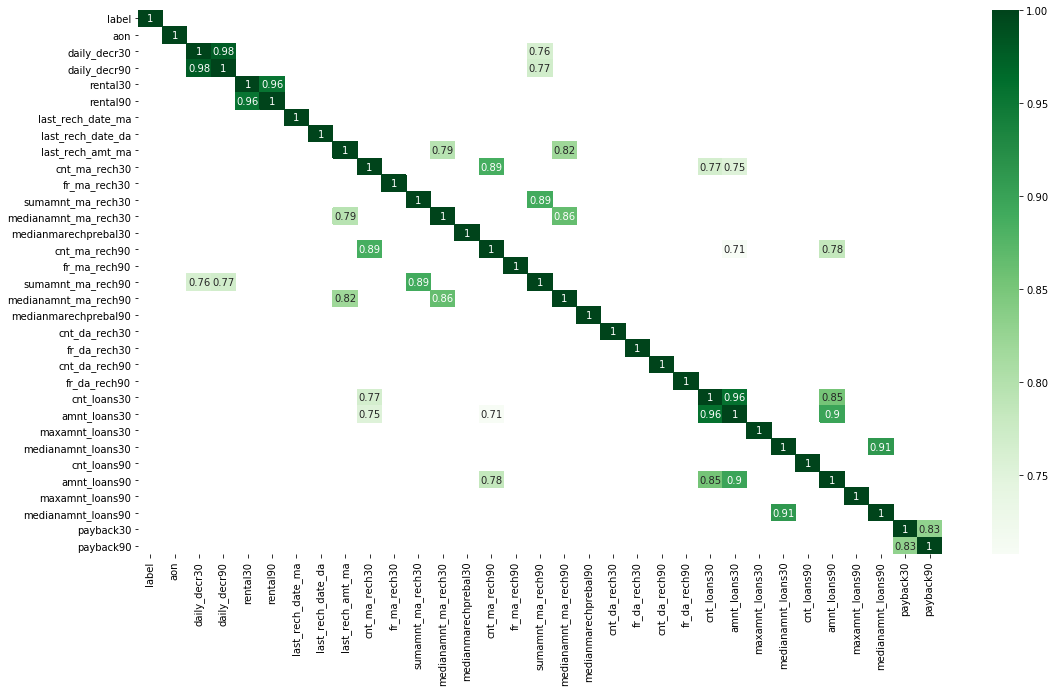

In [8]:
###############################  viewing highly correlated features which have correlation coefficient < 0.7 ###################
plt.figure(figsize=(18,10))
df=Data_file.corr()
sb.heatmap(df[(df>0.7)],annot=True,cmap='Greens')

* Dataset contains multicolinearity problem as some features are highly correlated. Hence dropping some highly correlated columns in next step

In [9]:
#################### checking correlation of all features with label ##################
df_=Data_file.corr()
df_['label']

label                   1.000000
aon                    -0.003785
daily_decr30            0.168298
daily_decr90            0.166150
rental30                0.058085
rental90                0.075521
last_rech_date_ma       0.003728
last_rech_date_da       0.001711
last_rech_amt_ma        0.131804
cnt_ma_rech30           0.237331
fr_ma_rech30            0.001330
sumamnt_ma_rech30       0.202828
medianamnt_ma_rech30    0.141490
medianmarechprebal30   -0.004829
cnt_ma_rech90           0.236392
fr_ma_rech90            0.084385
sumamnt_ma_rech90       0.205793
medianamnt_ma_rech90    0.120855
medianmarechprebal90    0.039300
cnt_da_rech30           0.003827
fr_da_rech30           -0.000027
cnt_da_rech90           0.002999
fr_da_rech90           -0.005418
cnt_loans30             0.196283
amnt_loans30            0.197272
maxamnt_loans30         0.000248
medianamnt_loans30      0.044589
cnt_loans90             0.004733
amnt_loans90            0.199788
maxamnt_loans90         0.084144
medianamnt

In [4]:
################### dropping highly correlated features to resolve multicolenearity issue#########################
data_file=Data_file.drop(['daily_decr30','rental30','last_rech_amt_ma','cnt_ma_rech30','sumamnt_ma_rech90','medianamnt_ma_rech90','cnt_loans30','amnt_loans30','payback30','amnt_loans90','medianamnt_loans90'],axis=1)

In [5]:
##################### dropping irrelevant columns from dataset#####################
data_file.drop(['msisdn','pcircle','pdate'],axis=1,inplace=True)

In [12]:
data_file.head()

label    aon  daily_decr90  rental90  last_rech_date_ma  last_rech_date_da  \
0      0  272.0   3065.150000    260.13                2.0                0.0   
1      1  712.0  12124.750000   3691.26               20.0                0.0   
2      1  535.0   1398.000000    900.13                3.0                0.0   
3      1  241.0     21.228000    159.42               41.0                0.0   
4      1  947.0    150.619333   1098.90                4.0                0.0   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  ...  medianmarechprebal90  cnt_da_rech30  \
0                  7.50  ...                  7.50            0.0   
1                 61.04  ...                 61.04            0.0   
2                 66.32  ...                 66.32            0.0   
3                  0.00  ...                  2.50            0.0   
4                 29.00  ...                 35.00            0.0   

   fr_da_rech30  cnt_da_rech90  fr_da_rech90  maxamnt_loans30  \
0           0.0              0             0              6.0   
1           0.0              0             0             12.0   
2           0.0              0             0              6.0   
3           0.0              0             0              6.0   
4           0.0              0             0              6.0   

   medianamnt_loans30  cnt_loans90  maxamnt_loans90  payback90  
0                 0.0          2.0                6  29.000000  
1                 0.0          1.0               12   0.000000  
2                 0.0          1.0                6   0.000000  
3                 0.0          2.0                6   0.000000  
4                 0.0          7.0                6   2.333333  

[5 rows x 22 columns]

In [13]:
data_file.iloc[:,0:11].describe()

label            aon   daily_decr90       rental90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    6082.515068    3483.406534   
std         0.330519   75696.082531   10918.812767    5770.461279   
min         0.000000     -48.000000     -93.012667  -24720.580000   
25%         1.000000     246.000000      42.692000     300.260000   
50%         1.000000     527.000000    1500.000000    1334.000000   
75%         1.000000     982.000000    7802.790000    4201.790000   
max         1.000000  999860.755200  320630.000000  200148.110000   

       last_rech_date_ma  last_rech_date_da   fr_ma_rech30  sumamnt_ma_rech30  \
count       209593.00000      209593.000000  209593.000000      209593.000000   
mean          3755.84780        3712.202921    3737.355121        7704.501157   
std          53905.89223       53374.833430   53643.625172       10139.621714   
min            -29.00000         -29.000000       0.000000           0.000000   
25%              1.00000           0.000000       0.000000        1540.000000   
50%              3.00000           0.000000       2.000000        4628.000000   
75%              7.00000           0.000000       6.000000       10010.000000   
max         998650.37770      999171.809400  999606.368100      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  
count         209593.000000         209593.000000   209593.00000  
mean            1812.817952           3851.927942        6.31543  
std             2070.864620          54006.374433        7.19347  
min                0.000000           -200.000000        0.00000  
25%              770.000000             11.000000        2.00000  
50%             1539.000000             33.900000        4.00000  
75%             1924.000000             83.000000        8.00000  
max            55000.000000         999479.419300      336.00000

In [14]:
data_file.iloc[:,11:].describe()

fr_ma_rech90  medianmarechprebal90  cnt_da_rech30   fr_da_rech30  \
count  209593.000000         209593.000000  209593.000000  209593.000000   
mean        7.716780             92.025541     262.578110    3749.494447   
std        12.590251            369.215658    4183.897978   53885.414979   
min         0.000000           -200.000000       0.000000       0.000000   
25%         0.000000             14.600000       0.000000       0.000000   
50%         2.000000             36.000000       0.000000       0.000000   
75%         8.000000             79.310000       0.000000       0.000000   
max        88.000000          41456.500000   99914.441420  999809.240100   

       cnt_da_rech90   fr_da_rech90  maxamnt_loans30  medianamnt_loans30  \
count  209593.000000  209593.000000    209593.000000       209593.000000   
mean        0.041495       0.045712       274.658747            0.054029   
std         0.397556       0.951386      4245.264648            0.218039   
min         0.000000       0.000000         0.000000            0.000000   
25%         0.000000       0.000000         6.000000            0.000000   
50%         0.000000       0.000000         6.000000            0.000000   
75%         0.000000       0.000000         6.000000            0.000000   
max        38.000000      64.000000     99864.560860            3.000000   

         cnt_loans90  maxamnt_loans90      payback90  
count  209593.000000    209593.000000  209593.000000  
mean       18.520919         6.703134       4.321485  
std       224.797423         2.103864      10.308108  
min         0.000000         0.000000       0.000000  
25%         1.000000         6.000000       0.000000  
50%         2.000000         6.000000       1.666667  
75%         5.000000         6.000000       4.500000  
max      4997.517944        12.000000     171.500000

* some features have negative values
* In all features except ‘label’ , ‘maxamnt_loans90’the standard deviation is higher than the mean which implies these all features are having high variance in their values and spread of data is very high.
* In Some features the 25 , 50 and 75th  percentile values are same i.e ‘0’. Which implies these most of the values in these features were ‘0’. These features are ‘cnt_da_rech30’, ‘fr_da_rech30’, ‘cnt_da_rech90’, ‘fr_da_rech90’, ‘medianamnt_loans30’ and ‘last_rech_data_da’
* The 50th percentile value for ‘payback90’ is approx. 1 which implies that 50% of people payed back the loan within 1 day when last 90 days was considered into account.

###### Memory Optimization

In [15]:
####################### since highest and lowest values within each feature is 32 bit range hence changing the datatypes of features from 64 bit to 32 bit for efficient memory use ###################3
for i in data_file.columns:
    if(data_file.dtypes[i]=='int64'):
        data_file[i]=data_file[i].astype('int32')
    if(data_file.dtypes[i]=='float64'):
        data_file[i]=data_file[i].astype('float32')

###### Data Analysis

C:\Users\guptaek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\guptaek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


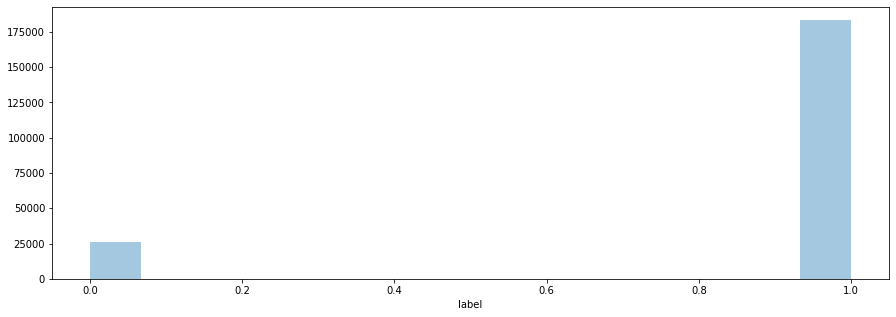

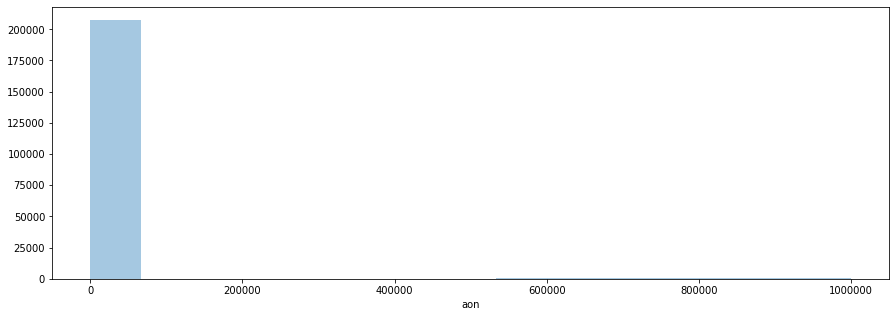

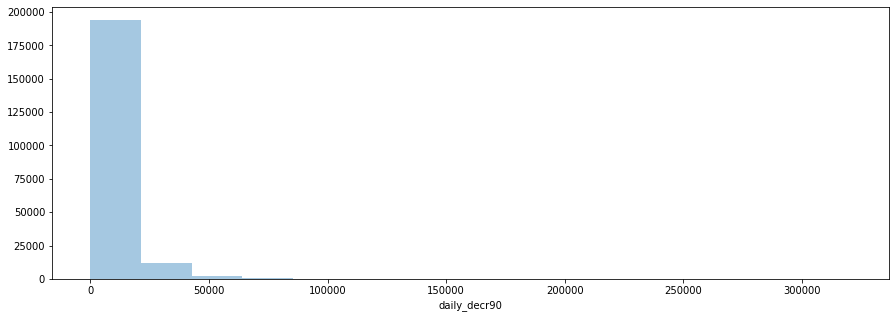

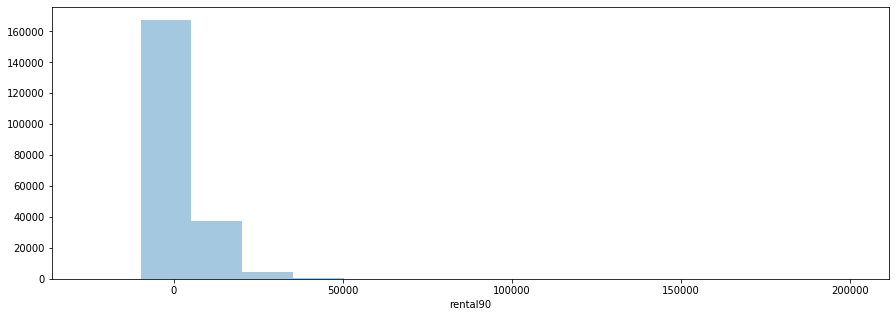

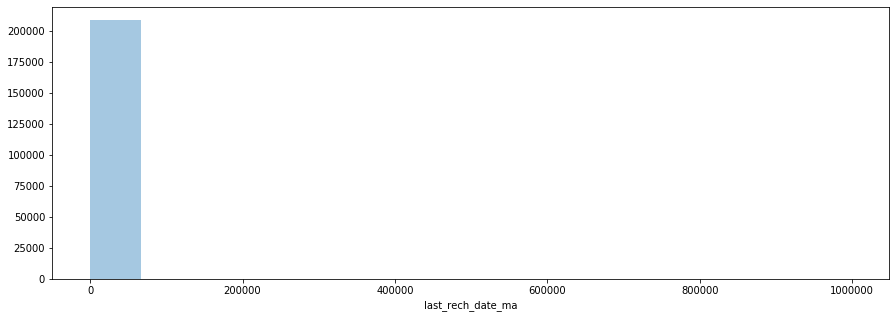

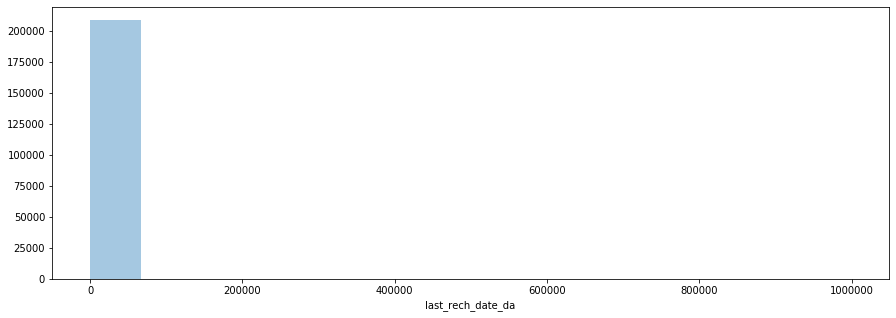

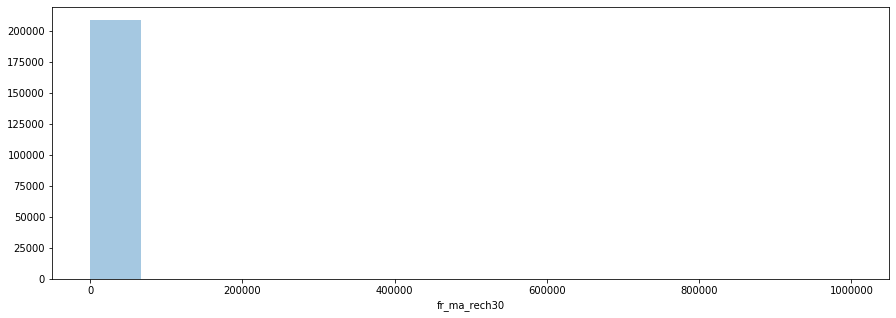

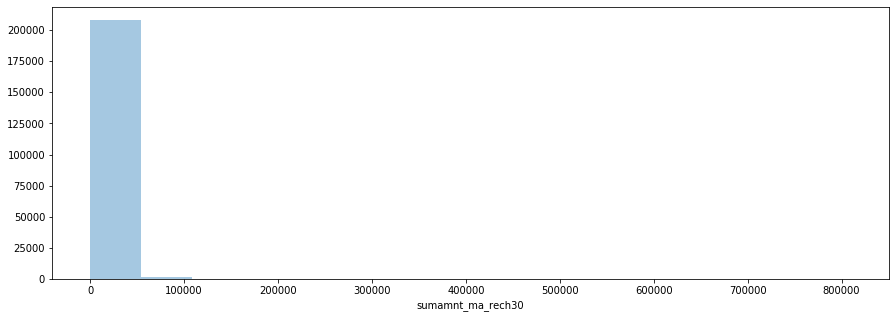

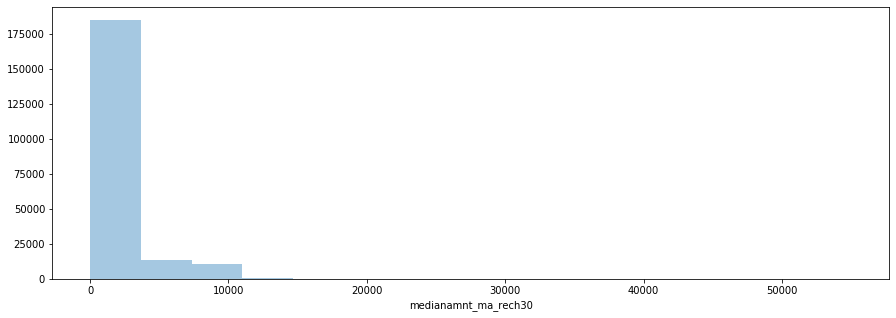

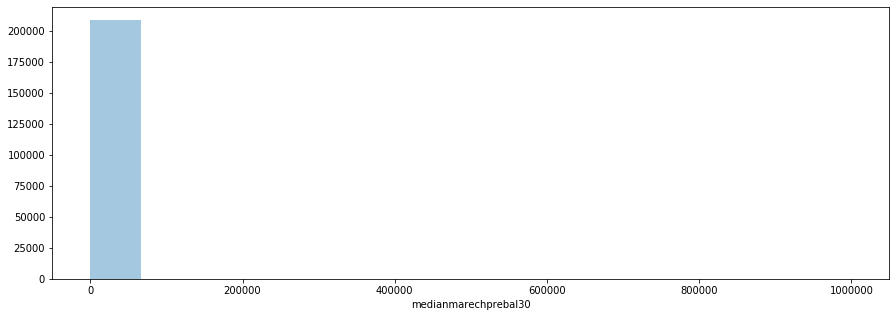

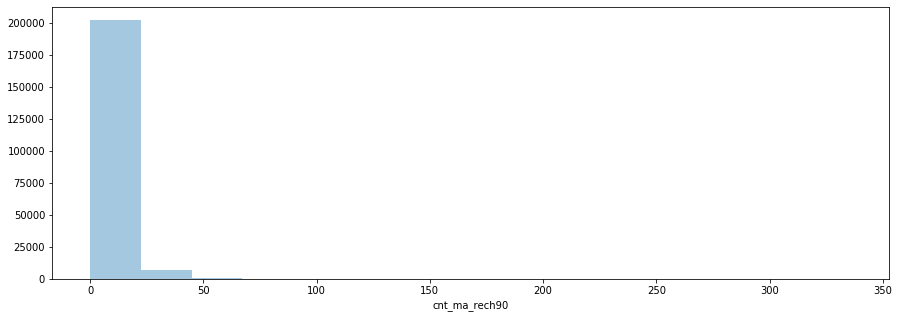

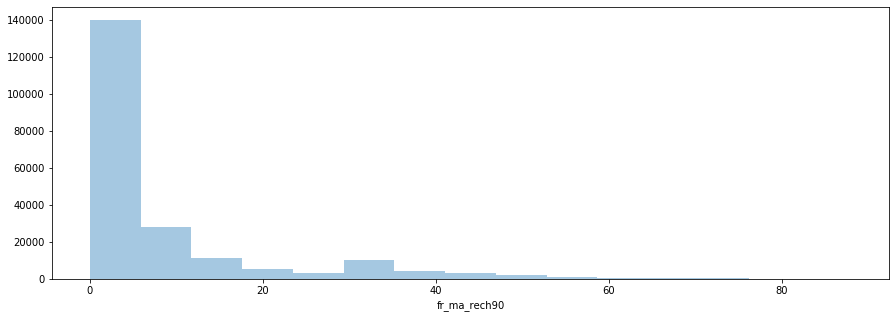

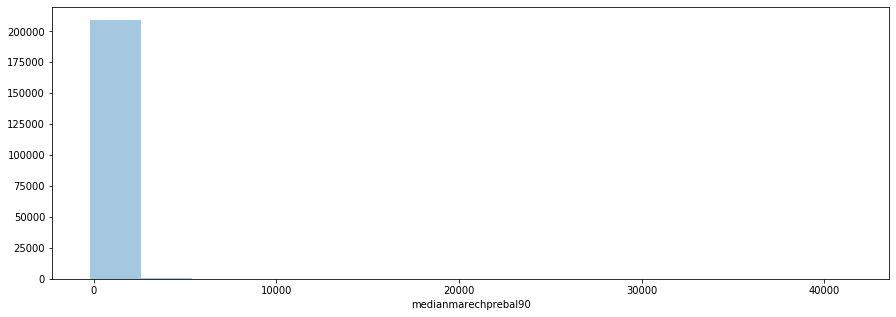

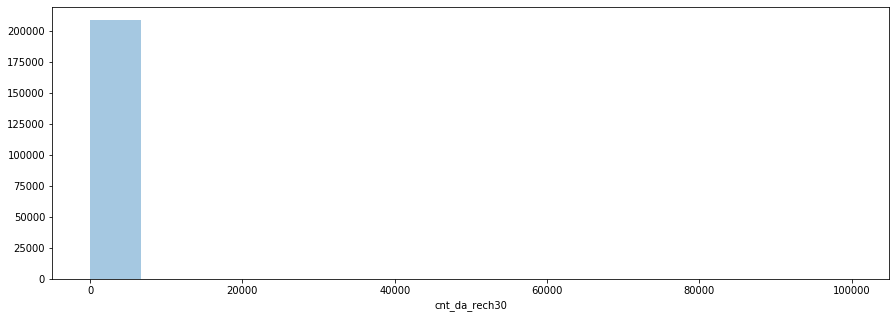

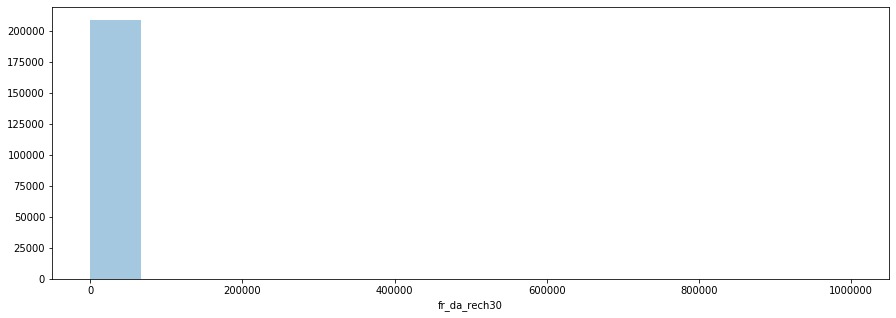

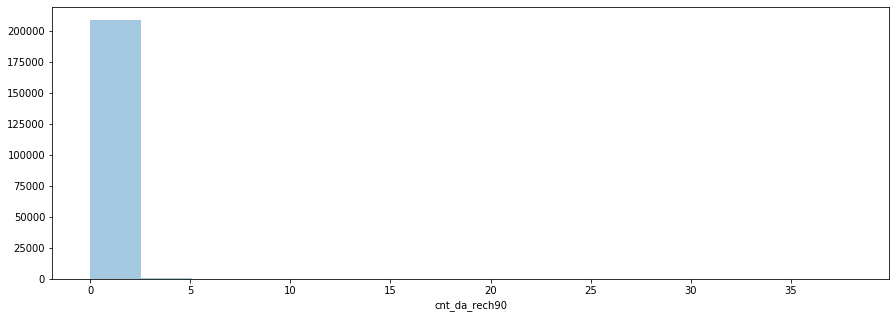

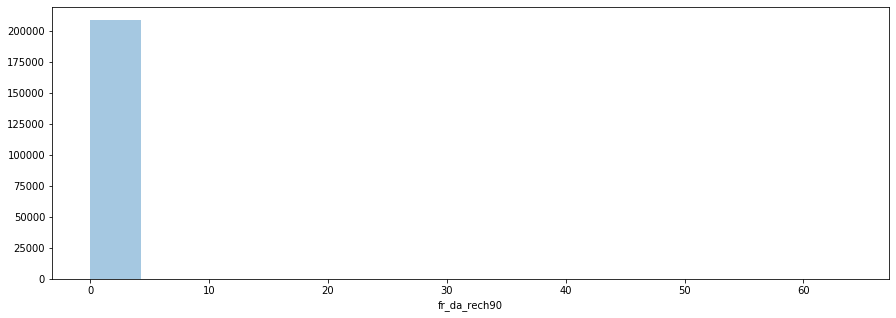

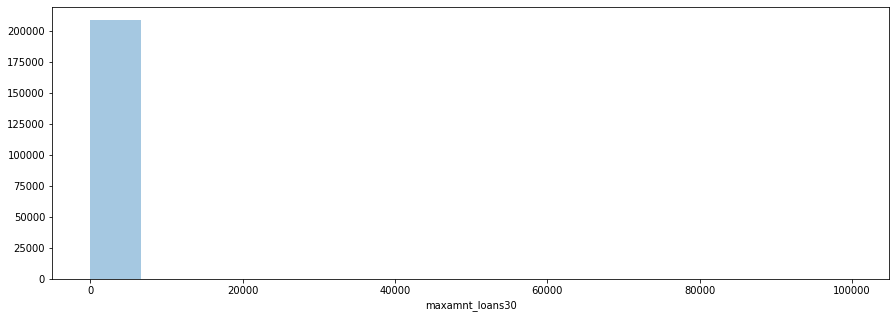

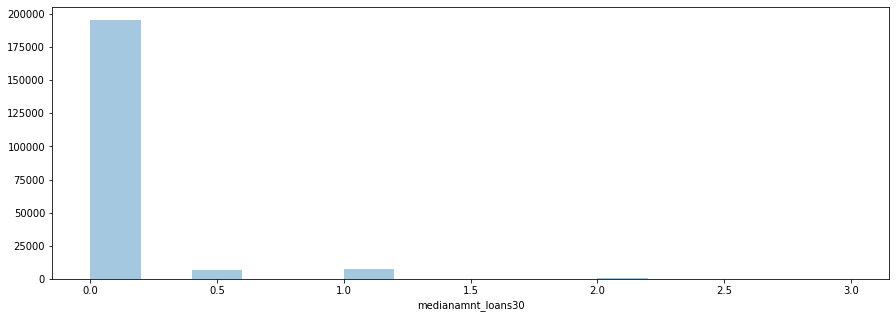

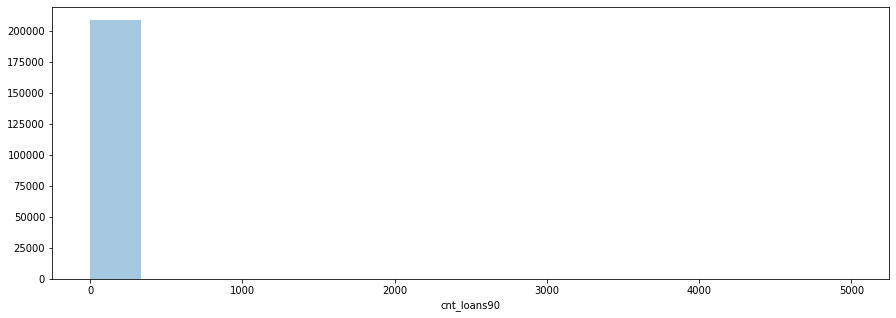

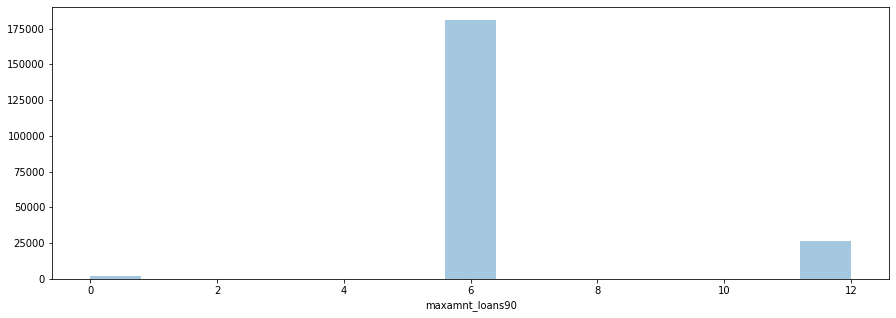

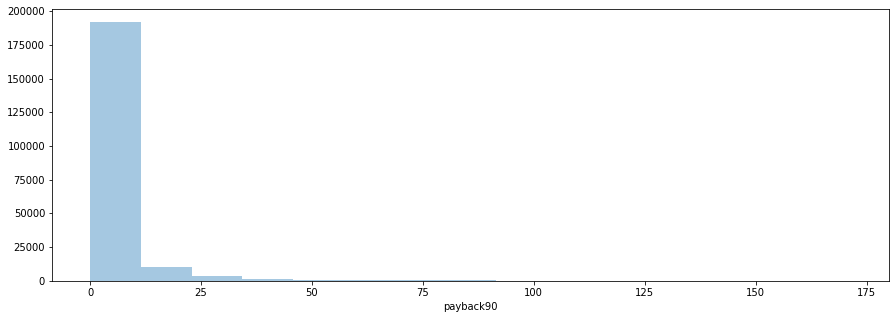

In [16]:
import warnings
warnings.filterwarnings('ignore')
###################### viewing distribution of each feature################
for i in data_file.columns:
    plt.subplots(figsize=(15,5))
    sb.distplot(data_file[i],bins=15,kde=False)

label
0    0.124823
1    0.875177
Name: aon, dtype: float64


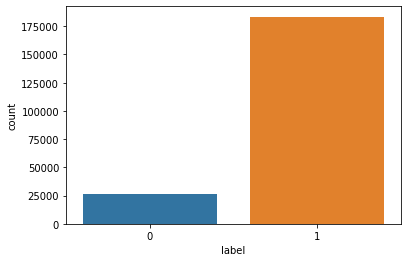

In [17]:
sb.countplot(x='label',data=data_file)
print(data_file.groupby('label').count()['aon']/209593)

* 87% label are 1 and only 12.5 % are 0

In [18]:
data_file[data_file['aon']<0].shape

(1539, 22)

* 1539 values in aon feature are negative which is unrealistic

In [79]:
df0=data_file[data_file['label']==0]
df1=data_file[data_file['label']==1]


C:\Users\guptaek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


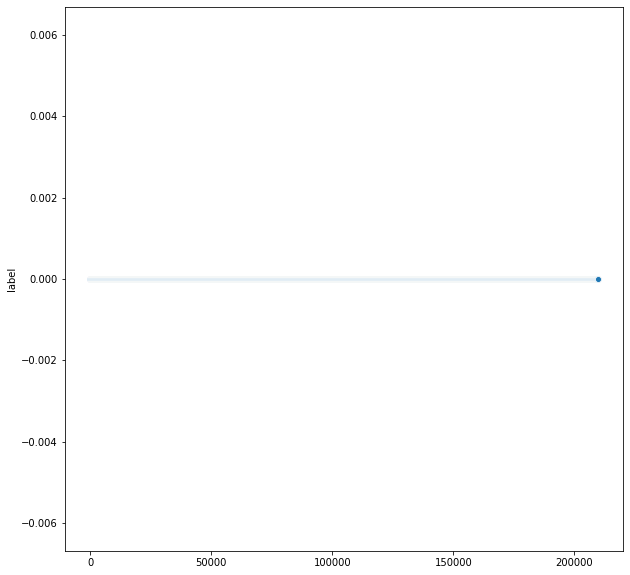

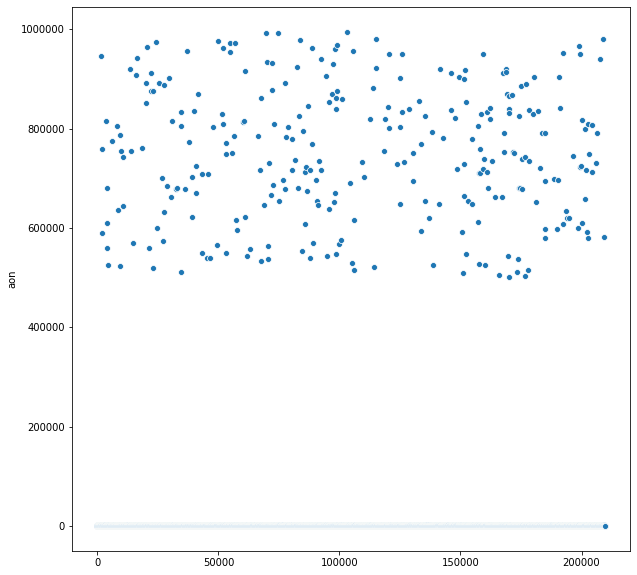

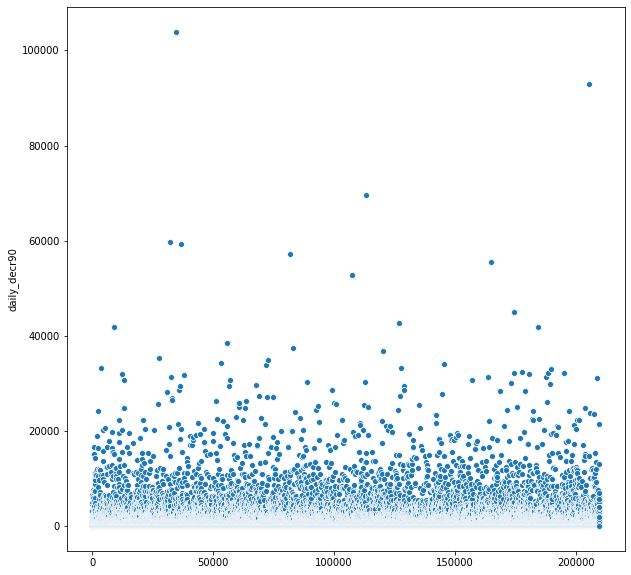

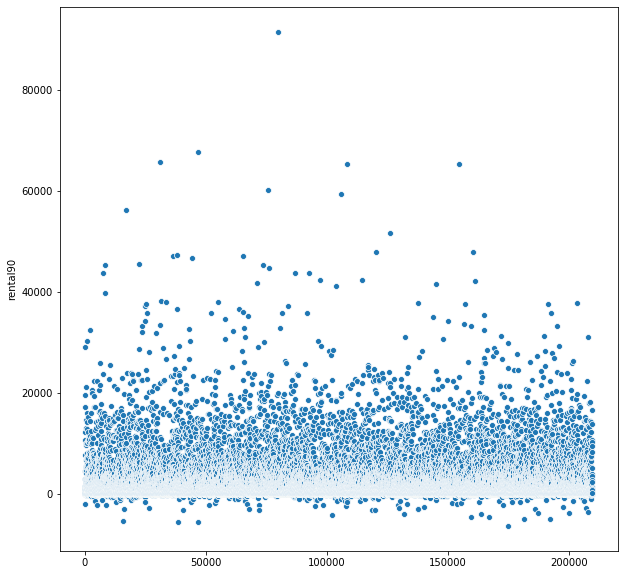

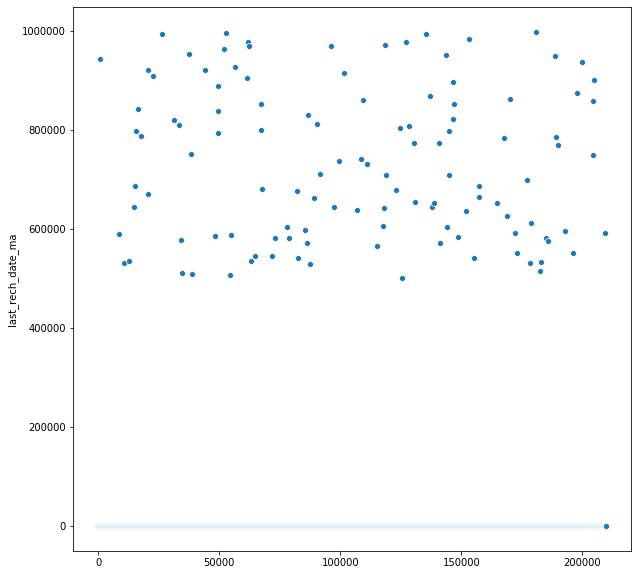

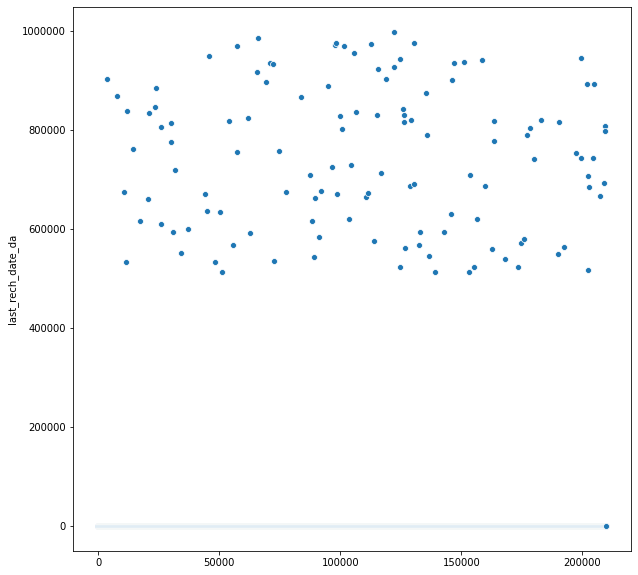

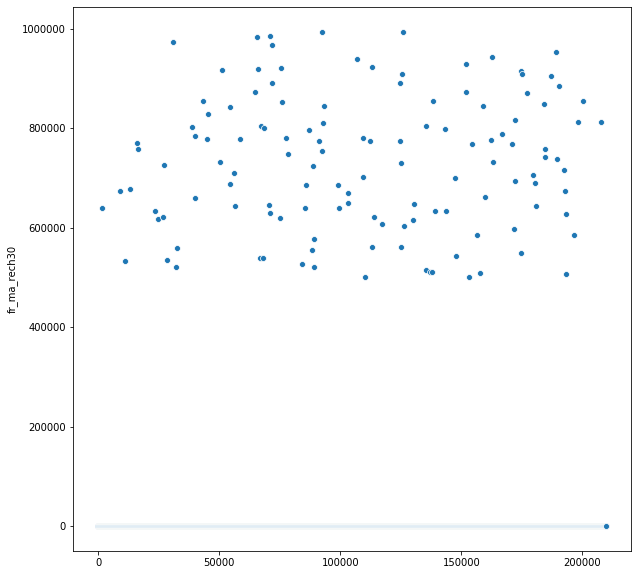

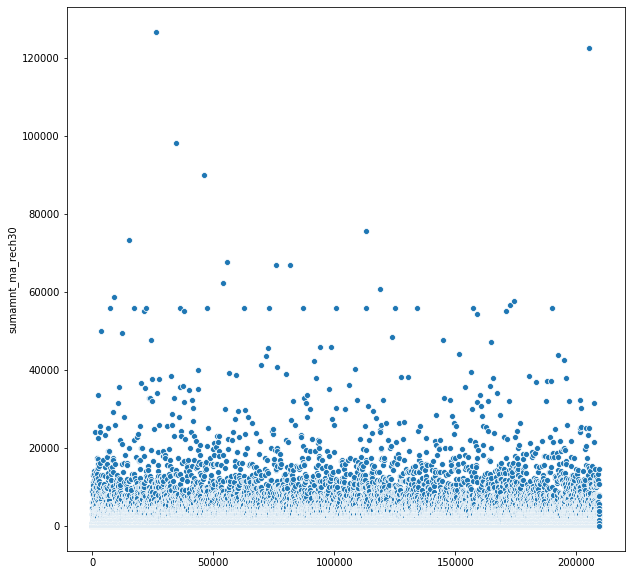

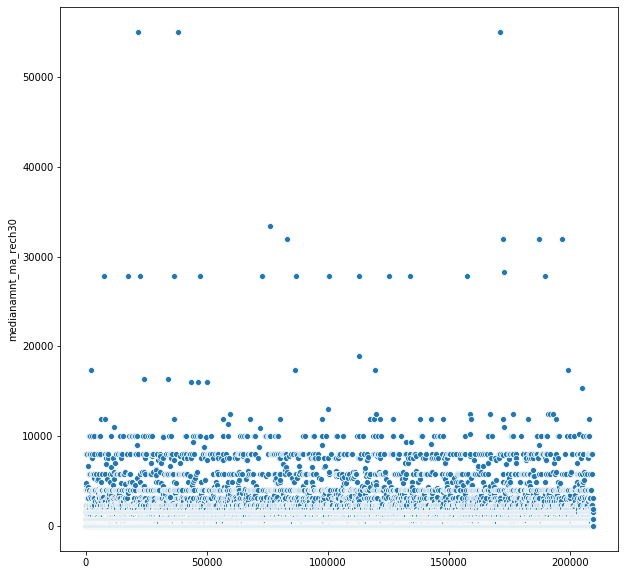

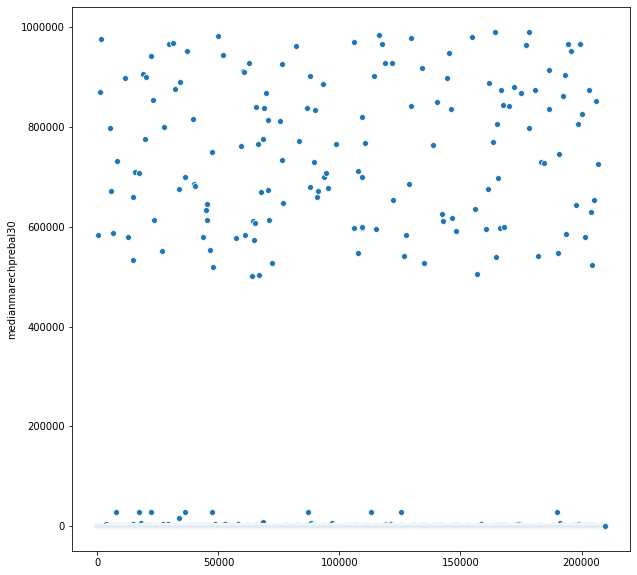

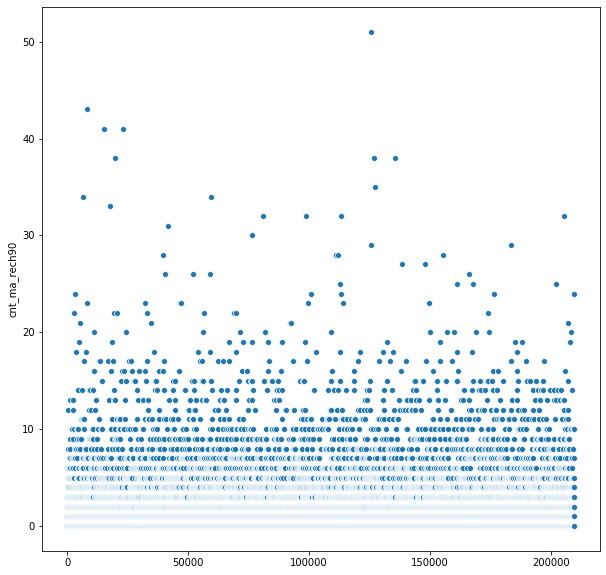

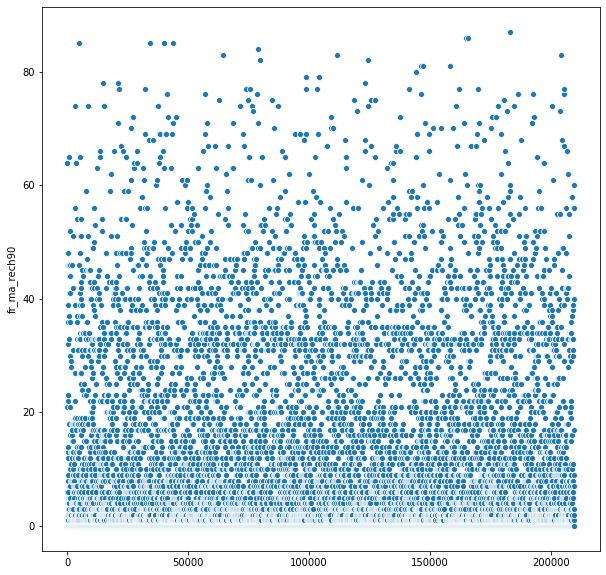

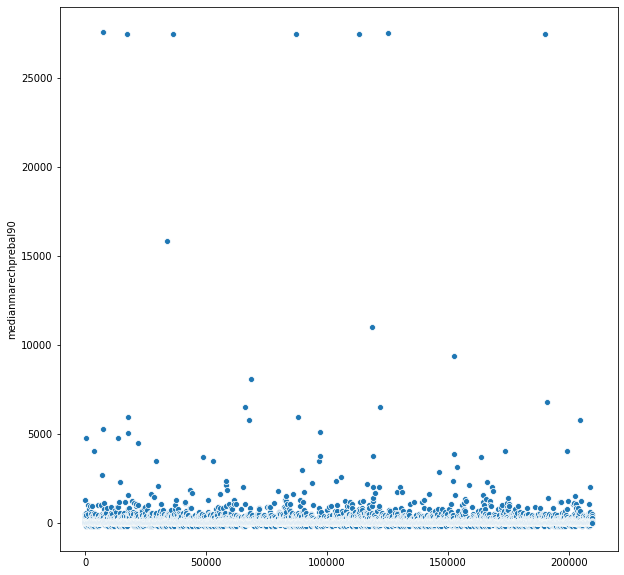

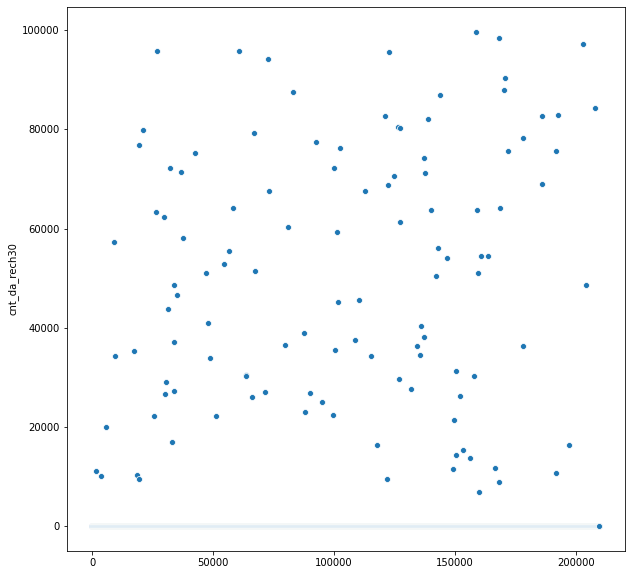

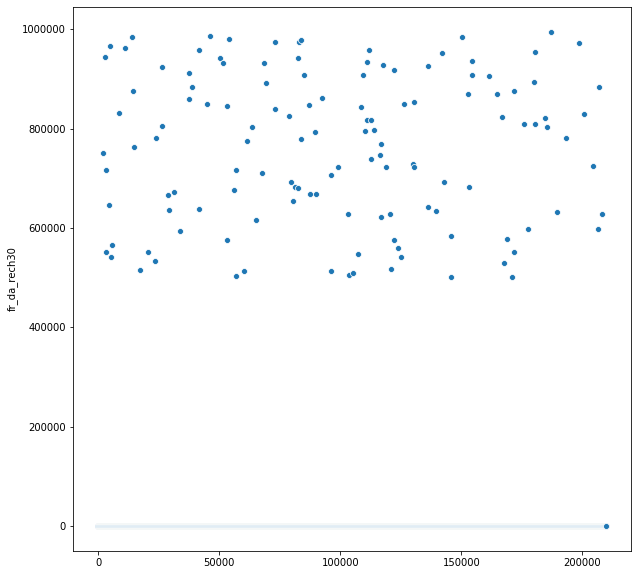

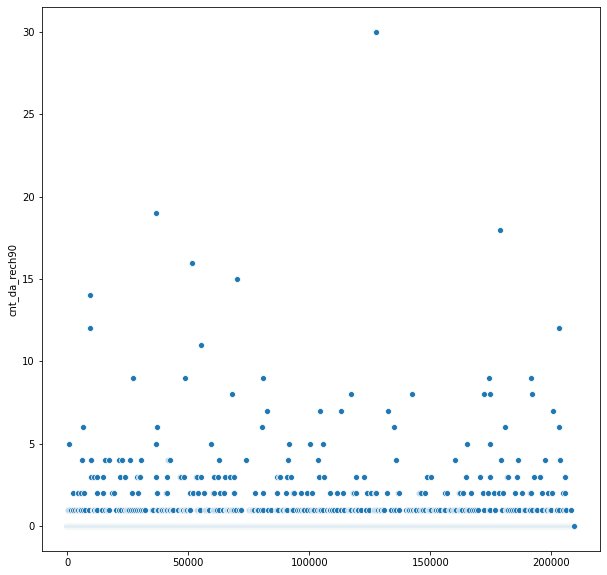

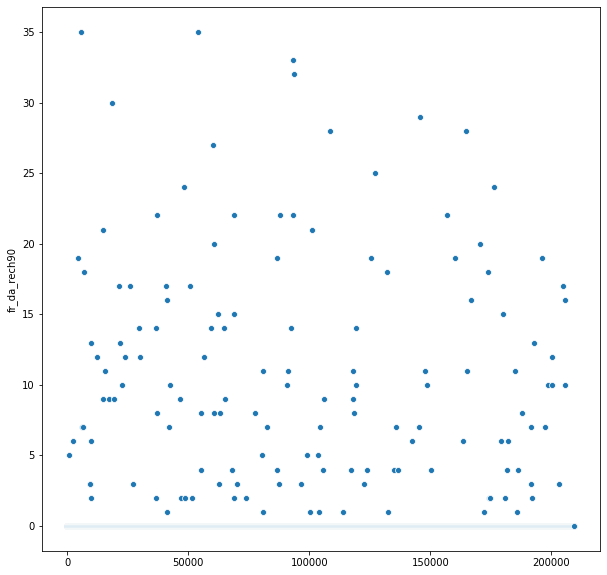

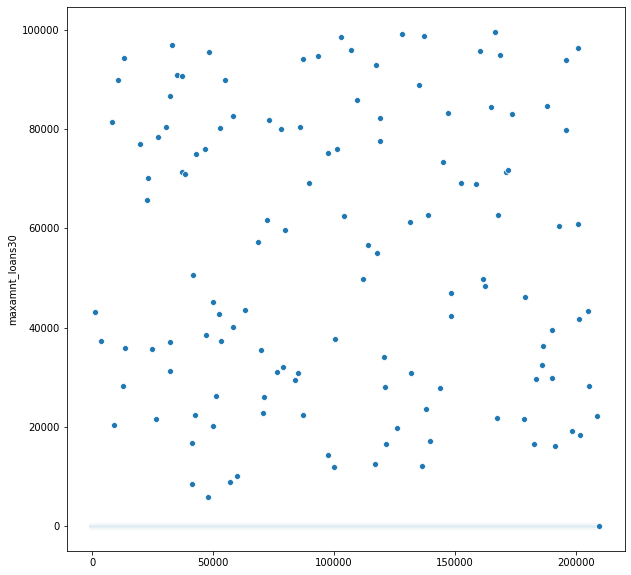

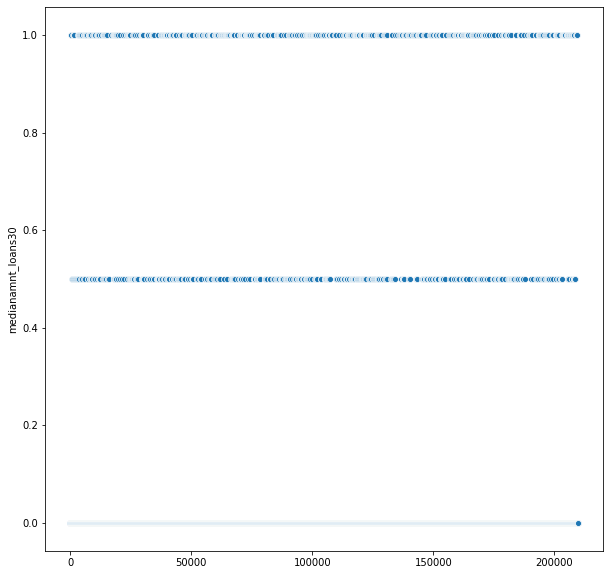

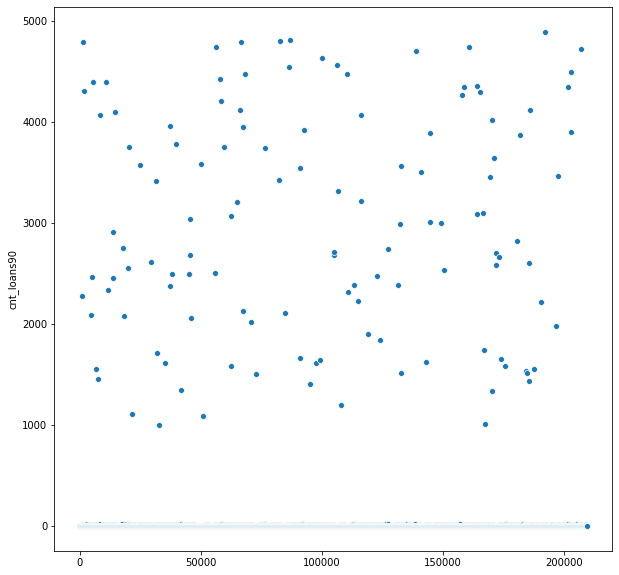

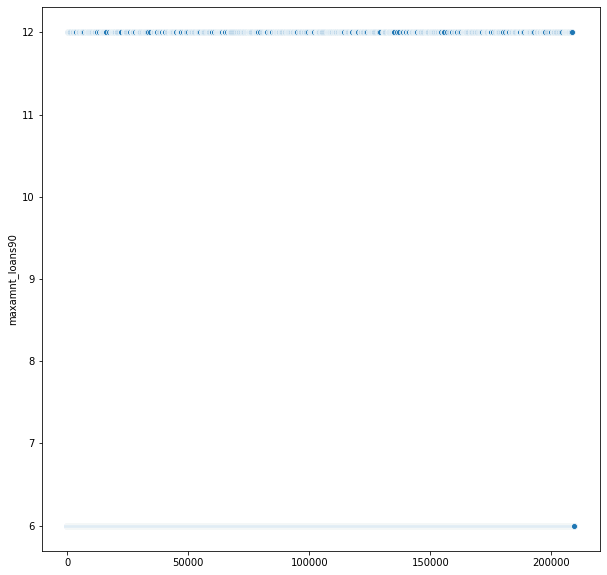

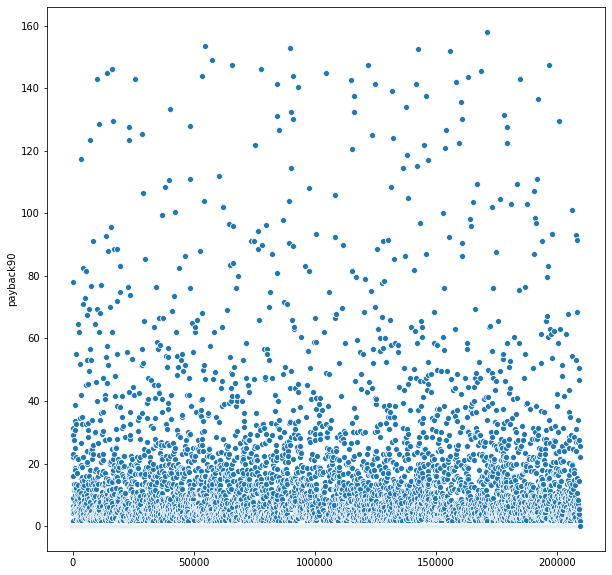

In [20]:
######################## viewing distribution of data points of each attribute using scatter plot##############################
for i in df0.columns:
    plt.subplots(figsize=(10,10))
    sb.scatterplot(x=df0.index,y=df0[i],data=df0)
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()

In [21]:
for i in df0.columns:
        print('\n',df0[i].value_counts().sort_index().head(10))


 0    26162
Name: label, dtype: int64

 -48.0    12
-47.0    14
-46.0    15
-45.0     4
-44.0    13
-43.0    12
-42.0    14
-41.0    14
-40.0    15
-39.0    12
Name: aon, dtype: int64

 -18.378000     1
-14.205000     1
-13.077000     1
-12.807000     1
-9.891000      1
-9.130000      1
-7.480000      1
-5.782333      1
-5.000000     33
-4.940000      1
Name: daily_decr90, dtype: int64

 -6422.259766    1
-5686.029785    1
-5556.540039    1
-5479.439941    1
-5034.759766    1
-4929.299805    1
-4609.979980    1
-4601.520020    1
-4205.410156    1
-4012.149902    1
Name: rental90, dtype: int64

 -28.0       1
-25.0       1
-23.0       1
-20.0       1
-19.0       1
-16.0       3
-3.0        1
 0.0     9048
 1.0     1798
 2.0     1952
Name: last_rech_date_ma, dtype: int64

 0.0     25578
2.0         3
3.0         2
4.0         2
5.0         2
6.0         2
7.0        20
8.0        17
9.0        15
10.0       16
Name: last_rech_date_da, dtype: int64

 0.0    19569
1.0      963
2.0      71

* There is no defaulter when age on cellular network in days is greater than 3000 and less than 500000
* Age on cellular network contains negative values which is unrealistic
* Avg Daily amount spent  from main account for all defaulters is in range from 0 to 40000 for 90 % of the cases.Negative values in this attribute is unrealistic since amount spent can't be negative
* 90% of defaulters has not skipped recharging their main and data account even a single day since number of days till last recharge is '0' for 90% of cases
* Average of main account balance over last 90 days(rental90) contains unrealistic negative values
* medianamnt_ma_rech30 contains unrealistic negative values since recharges done can't be negative
* Frequency of main account recharged in last 90 days contains unrealistic negative values.
* Number of times main account reharged in last 30 days varies from 0 to 50 for defaulters
* 99% of the defaulters have not recharged their data account within last 30 days
* Maximum amount of loan taken in last 30 days contains values other than 5 and 10
* There are some defaulters who have taken even more than 1000 loans in last 30 days
* Average payback time in last 90 days has wide distribution in which 80% values are between 0 to 60
* Average main account balance for some defaulters went negative 

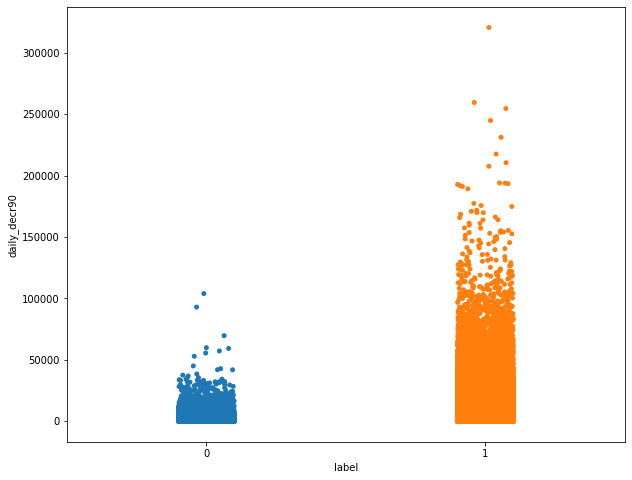

In [22]:
plt.figure(figsize=(10,8))
sb.stripplot(y='daily_decr90',x='label',data=data_file)

* Daily amount spent from the main account (averaged over last 90 days) of deafaulters is cosiderably low in comparison to non defaulters.

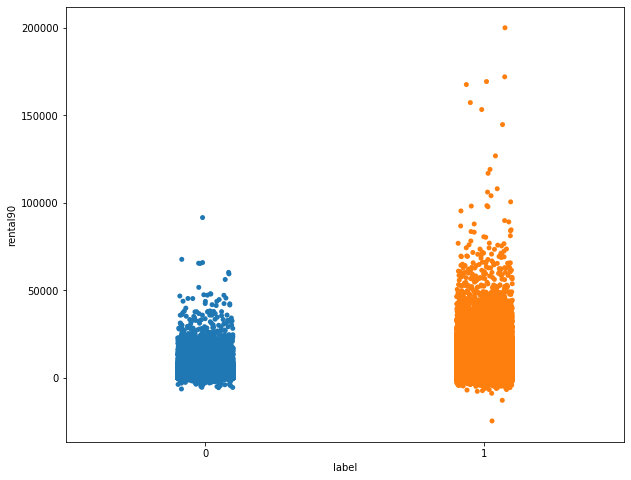

In [23]:
plt.figure(figsize=(10,8))
sb.stripplot(y='rental90',x='label',data=data_file)

* Main Account balance for defaulters does not rise above 15000 in comparison to non defaulters

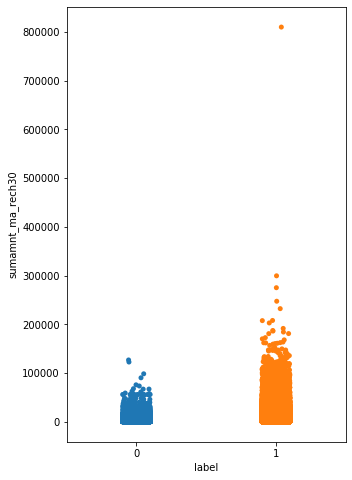

In [24]:
plt.figure(figsize=(5,8))
sb.stripplot(y='sumamnt_ma_rech30',x='label',data=data_file)


* Total amount of recharge for main account is less than 10000 for defaulters for sure

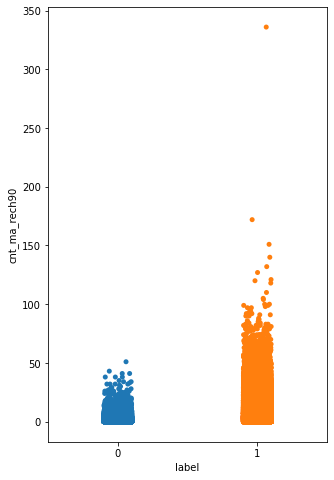

In [25]:
plt.figure(figsize=(5,8))
sb.stripplot(y='cnt_ma_rech90',x='label',data=data_file)

* Defaulters recharged their main account in range 0 to 50 times only but non defaulter recharged even more than 50 times

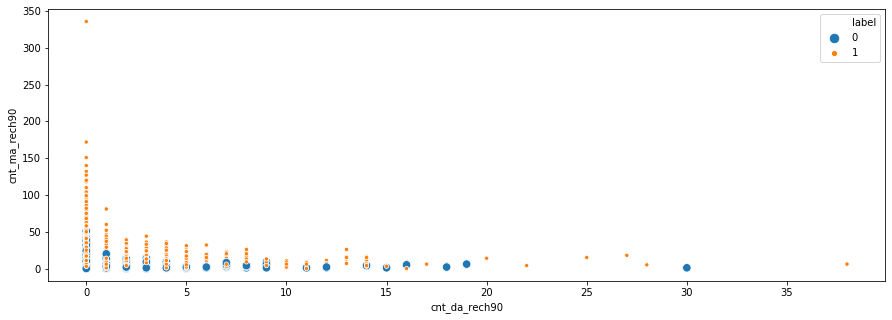

In [82]:
plt.figure(figsize=(15,5))
sb.scatterplot(x='cnt_da_rech90',y='cnt_ma_rech90',hue='label',size='label',data=data_file)

* it can be seen that the graph is exponentially decreasing it implies that when main recharge count is high less data recharges was done and vice versa

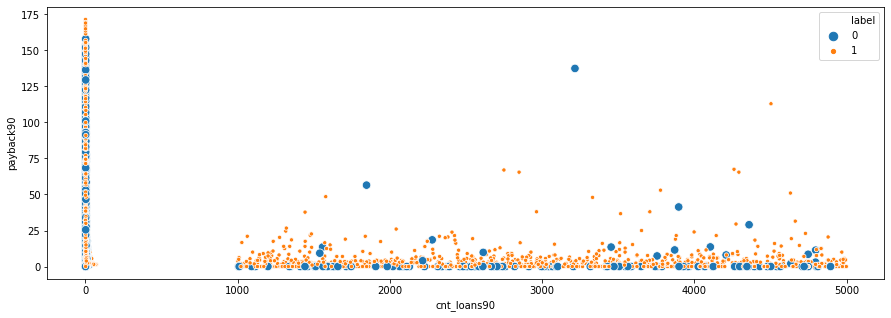

In [83]:
plt.figure(figsize=(15,5))
sb.scatterplot(x='cnt_loans90',y='payback90',hue='label',size='label',data=data_file)

* It can be seen that when customers have taken higher number of loans the average payback time is around 0 for most of the cases this implies that customers have tried paying back the loan on time when they took high number of loans but still some of them turned defaulters
* on the other hand when customers have taken less number of loans the average payback time goes on increasing.

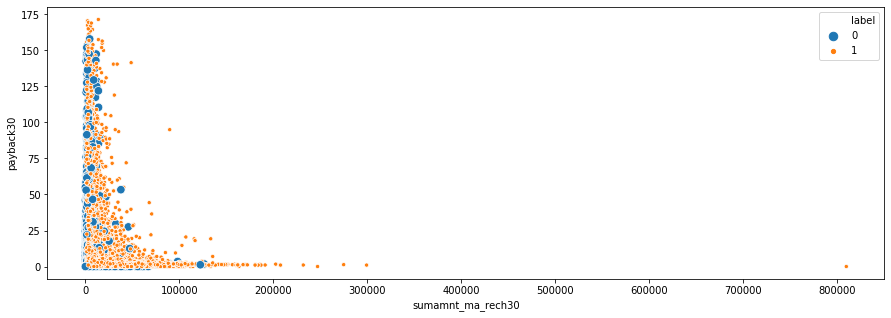

In [87]:
plt.figure(figsize=(15,5))
sb.scatterplot(x='sumamnt_ma_rech30',y='payback30',hue='label',size='label',data=Data_file)

* Total amount of recharge done in  main account is not very high in case of defaulters this implies most defaulters have taken loans of small amount in comparison to non defaulters

label                      AxesSubplot(0.125,0.772143;0.168478x0.107857)
aon                     AxesSubplot(0.327174,0.772143;0.168478x0.107857)
daily_decr90            AxesSubplot(0.529348,0.772143;0.168478x0.107857)
rental90                AxesSubplot(0.731522,0.772143;0.168478x0.107857)
last_rech_date_ma          AxesSubplot(0.125,0.642714;0.168478x0.107857)
last_rech_date_da       AxesSubplot(0.327174,0.642714;0.168478x0.107857)
fr_ma_rech30            AxesSubplot(0.529348,0.642714;0.168478x0.107857)
sumamnt_ma_rech30       AxesSubplot(0.731522,0.642714;0.168478x0.107857)
medianamnt_ma_rech30       AxesSubplot(0.125,0.513286;0.168478x0.107857)
medianmarechprebal30    AxesSubplot(0.327174,0.513286;0.168478x0.107857)
cnt_ma_rech90           AxesSubplot(0.529348,0.513286;0.168478x0.107857)
fr_ma_rech90            AxesSubplot(0.731522,0.513286;0.168478x0.107857)
medianmarechprebal90       AxesSubplot(0.125,0.383857;0.168478x0.107857)
cnt_da_rech30           AxesSubplot(0.327174,0.3838

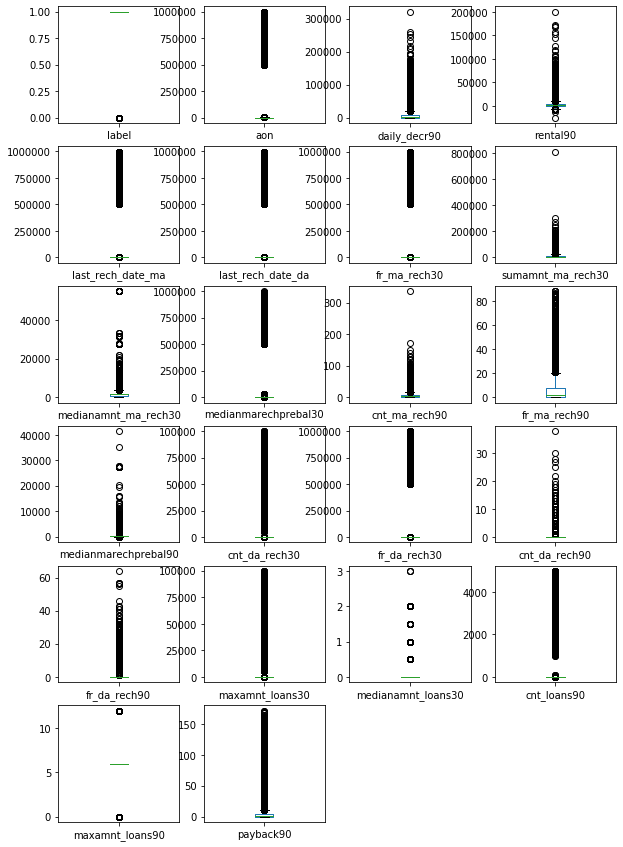

In [93]:
data_file.plot.box(subplots=True,figsize=(10,15),layout=(6,4))

* almost all attribute contains high number of outliers

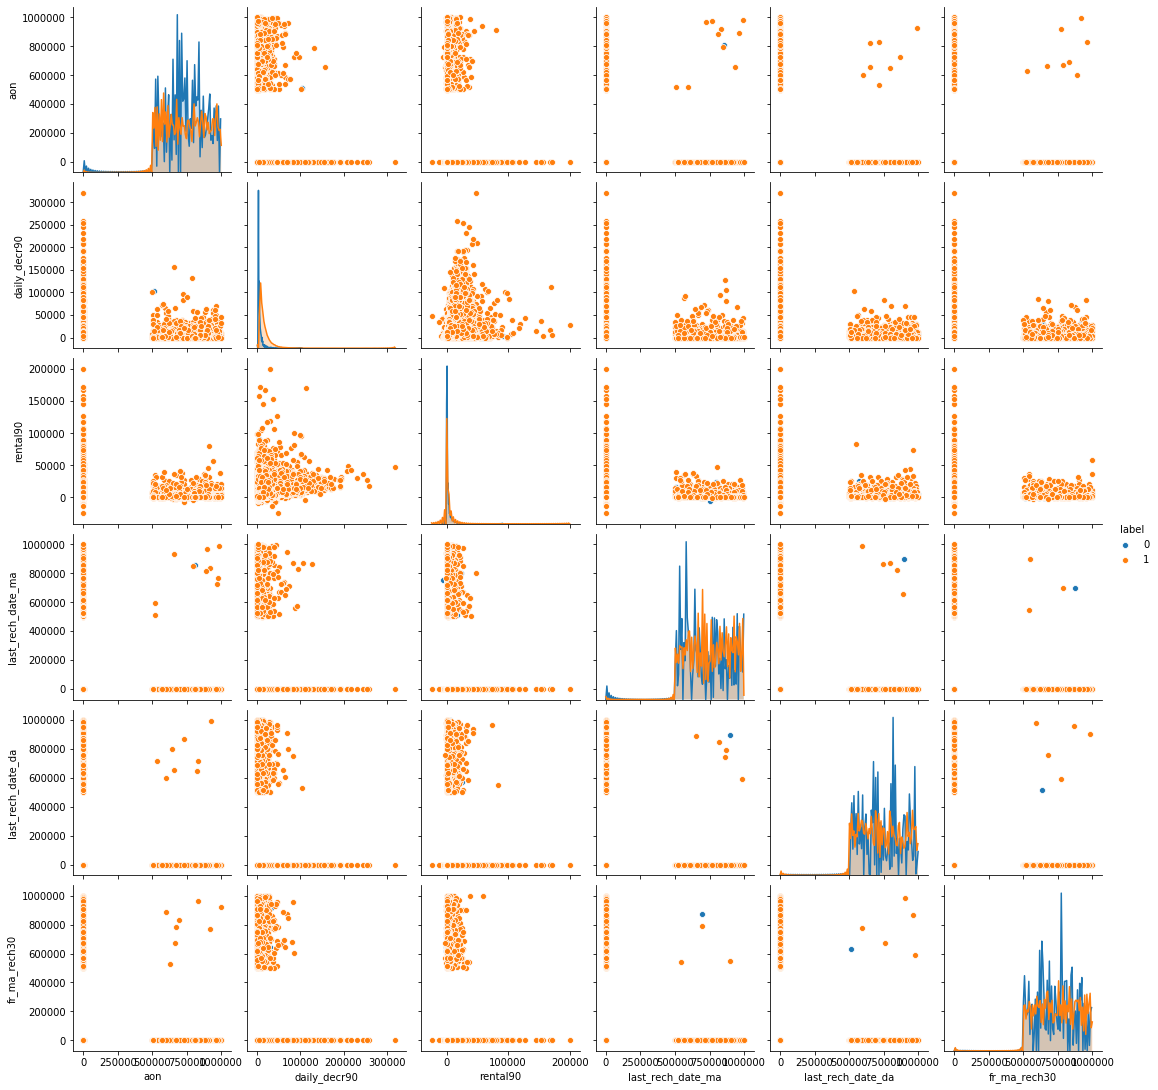

In [9]:
sb.pairplot(data=data_file.iloc[:,0:7],hue='label',diag_kws={'bw': 1.2})

* Label 0 can be seen overlapped with label 1 hence it will not be a good idea to use Logistic regression or any algorithm which works on plane separation .

In [104]:
data_file.head()

label    aon  daily_decr90     rental90  last_rech_date_ma  \
0      0  272.0   3065.149902   260.130005                2.0   
1      1  712.0  12124.750000  3691.260010               20.0   
2      1  535.0   1398.000000   900.130005                3.0   
3      1  241.0     21.228001   159.419998               41.0   
4      1  947.0    150.619339  1098.900024                4.0   

   last_rech_date_da  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0                0.0          21.0             3078.0                1539.0   
1                0.0           0.0             5787.0                5787.0   
2                0.0           0.0             1539.0                1539.0   
3                0.0           0.0                0.0                   0.0   
4                0.0           2.0            20029.0                2309.0   

   medianmarechprebal30  ...  medianmarechprebal90  cnt_da_rech30  \
0              7.500000  ...              7.500000            0.0   
1             61.040001  ...             61.040001            0.0   
2             66.320000  ...             66.320000            0.0   
3              0.000000  ...              2.500000            0.0   
4             29.000000  ...             35.000000            0.0   

   fr_da_rech30  cnt_da_rech90  fr_da_rech90  maxamnt_loans30  \
0           0.0              0             0              6.0   
1           0.0              0             0             12.0   
2           0.0              0             0              6.0   
3           0.0              0             0              6.0   
4           0.0              0             0              6.0   

   medianamnt_loans30  cnt_loans90  maxamnt_loans90  payback90  
0                 0.0          2.0                6  29.000000  
1                 0.0          1.0               12   0.000000  
2                 0.0          1.0                6   0.000000  
3                 0.0          2.0                6   0.000000  
4                 0.0          7.0                6   2.333333  

[5 rows x 22 columns]

In [29]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int32  
 1   aon                   209593 non-null  float32
 2   daily_decr90          209593 non-null  float32
 3   rental90              209593 non-null  float32
 4   last_rech_date_ma     209593 non-null  float32
 5   last_rech_date_da     209593 non-null  float32
 6   fr_ma_rech30          209593 non-null  float32
 7   sumamnt_ma_rech30     209593 non-null  float32
 8   medianamnt_ma_rech30  209593 non-null  float32
 9   medianmarechprebal30  209593 non-null  float32
 10  cnt_ma_rech90         209593 non-null  int32  
 11  fr_ma_rech90          209593 non-null  int32  
 12  medianmarechprebal90  209593 non-null  float32
 13  cnt_da_rech30         209593 non-null  float32
 14  fr_da_rech30          209593 non-null  float32
 15  

In [30]:
Data_file.groupby('msisdn').sum().shape

(186243, 33)

* Available data is for 186243 customers

## Data preprocessing

#### 1. Dealing with unrealistic values

In [32]:
######################### making a copy of dataset ####################################3
data_file_=data_file.copy()


In [33]:
############################## Dealing with negative values of age on network in days(aon) attribute##############################
############## first replacing negative values with 0 and then replacing all zeros with mean of the attribute#################
for i in data_file_[data_file_['aon']<0].index:
    data_file_.iloc[i,1]=0
data_file_['aon'].replace(0,data_file_['aon'].mean(),inplace=True)

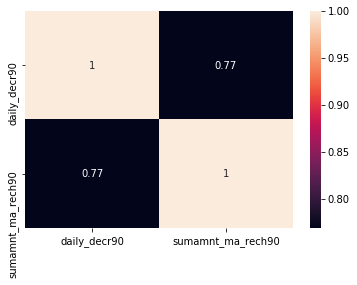

In [34]:
###################### Dealing with 'daily_decr90' negative values since daily amount spent can't be neagative##################
###################### We can see that 'daily_decr90' had very high correlation with 'sumamnt_ma_rech90' hence we are choosing to replace neagtive values with  'sumamnt_ma_rech90'################# 
sb.heatmap(Data_file.loc[:,['daily_decr90','sumamnt_ma_rech90']].corr(),annot=True)
########### We are first finding the resultant of 'sumamnt_ma_rech90' divided by 'daily_decr90' and then taking mean of all those resultants 
# This mean implies that on an average 'sumamnt_ma_rech90', is that mean values times of, 'daily_decr90' i.e 'sumamnt_ma_rech90'='daily_decr90'* (mean of resultants)
df=Data_file[Data_file['daily_decr90']>0]
temp_col=df['sumamnt_ma_rech90']/df['daily_decr90']
temp_col.mean()
for i in data_file_[data_file_['daily_decr90']<0].index:
    data_file_.iloc[i,2]=(Data_file.iloc[i,17]/160)

In [35]:
############################ Dealing with neagtive values of rental90 attribute########################
# considering values where rental90 is not negative
df=Data_file[Data_file['rental90']>0]
# Making a temporary variable which will store the values which is the result of daily_decr90 divided by rental 90
temp_col=df['daily_decr90']/df['rental90']
# Now to replace the negative values we will divide the daily_decr90 with the mean of temp_col
for i in data_file_[data_file_['rental90']<0].index:
    data_file_.iloc[i,3]=data_file_.iloc[i,2]/(temp_col.mean())

In [36]:
############################ Dealing with unrealistic values of 'last_rech_date_ma' attribute since number of days can't be -ve###########
# Here ,to replace negative values ,we are assuming that 'number of days till last reacharge of main account' (last_rech_date_ma)is equal to  'number of days till last reacharge of data account (last_rech_date_da)' 
for i in data_file_[data_file_['last_rech_date_ma']<0].index:
    data_file_.iloc[i,4]=data_file_.iloc[i,5]
# checking if there are still any values left and printing the mode of this attibute
print(data_file_['last_rech_date_ma'].mode())
data_file_[data_file_['last_rech_date_ma']<0]

0    1.0
dtype: float32


label    aon  daily_decr90    rental90  last_rech_date_ma  \
120100      1  900.0     27.693333  161.320007              -29.0   

        last_rech_date_da  fr_ma_rech30  sumamnt_ma_rech30  \
120100              -29.0           0.0             7526.0   

        medianamnt_ma_rech30  medianmarechprebal30  ...  medianmarechprebal90  \
120100                7526.0           6735.620117  ...           6735.620117   

        cnt_da_rech30  fr_da_rech30  cnt_da_rech90  fr_da_rech90  \
120100            1.0           0.0              1             0   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  maxamnt_loans90  \
120100              6.0                 0.0          2.0                6   

        payback90  
120100        0.0  

[1 rows x 22 columns]

In [37]:
# One row found replacing this with mode 
data_file_.iloc[120100,4]=1

In [38]:
######################## Dealing with unrealistic values of 'last_rech_date_da' attribute in the same way ########################
# Here ,to replace negative values ,we are assuming that 'number of days till last reacharge of data account' (last_rech_date_da)is equal to  'number of days till last reacharge of main account (last_rech_date_ma)' 
for i in data_file_[data_file_['last_rech_date_da']<0].index:
    data_file_.iloc[i,5]=data_file_.iloc[i,4]

In [39]:
######################## Dealing with unrealistic values of 'Median of main account balance just before recharge in last 90 days' (medianmarechprebal90) #########################
# viewing the value_counts
data_file_['medianmarechprebal90'].value_counts().head()

0.0     23391
20.0     1265
19.0     1208
26.0     1171
27.0     1166
Name: medianmarechprebal90, dtype: int64

In [40]:
# replacing neagtive values of 'medianmarechprebal90' with mode of this attribute i.e 0
for i in data_file_[data_file_['medianmarechprebal90']<0].index:
    data_file_.iloc[i,12]=0

In [41]:
# relacing negative values of 'medianmarechprebal30' with 'medianmarechprebal90'
for i in data_file_[data_file_['medianmarechprebal30']<0].index:
    data_file_.iloc[i,9]=data_file_.iloc[i,12]

* Dataset is now free from unrealistic values

#### 2. Dealing with Outliers

In [42]:
########################### Since we have crucial data we are considering 5 standard deviations while using zscore to remove outliers############
from scipy.stats import zscore
z=abs(zscore(data_file_))
data_file_NOoutliers=data_file_[(z<5).all(axis=1)]
print(data_file_.shape,'\n',data_file_NOoutliers.shape)
print(data_file_.shape[0]-data_file_NOoutliers.shape[0],'rows (i.e',"{:.2f}".format(((data_file_.shape[0]-data_file_NOoutliers.shape[0])/data_file_.shape[0])*100),'%) data removed as outliers')

(209593, 22) 
 (192664, 22)
16929 rows (i.e 8.08 %) data removed as outliers


#### 3. Checking and dealing with skewness

In [43]:
data_file_NOoutliers.skew()

label                   -2.253177
aon                      5.819152
daily_decr90             2.470146
rental90                 2.637960
last_rech_date_ma        3.552148
last_rech_date_da       10.004179
fr_ma_rech30             2.013801
sumamnt_ma_rech30        2.114089
medianamnt_ma_rech30     2.445531
medianmarechprebal30    11.296893
cnt_ma_rech90            1.919720
fr_ma_rech90             2.189555
medianmarechprebal90     4.997796
cnt_da_rech30           37.571191
fr_da_rech30            94.053581
cnt_da_rech90            7.447532
fr_da_rech90            73.600411
maxamnt_loans30         40.840662
medianamnt_loans30       4.086303
cnt_loans90             70.766133
maxamnt_loans90          1.743853
payback90                3.615755
dtype: float64

* Skewness ia very high for some attributes

In [44]:
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ usng yeo johnson's method to deal with skewness ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
# skipping label attribute
pt=[]
k=0
for i in data_file_NOoutliers.iloc[:,1:].columns:
    if(data_file_NOoutliers[i].skew()>0.55):
        pt.append([PowerTransformer(),i])
        pt[k][0].fit(data_file_NOoutliers[i].values.reshape(-1,1))
        data_file_NOoutliers[i]=pt[k][0].transform(data_file_NOoutliers[i].values.reshape(-1,1))
        k=k+1

In [45]:
data_file_NOoutliers.skew()

label                   -2.253177
aon                      0.001430
daily_decr90            -0.122563
rental90                -0.064833
last_rech_date_ma        0.040120
last_rech_date_da        6.413415
fr_ma_rech30             0.135751
sumamnt_ma_rech30       -0.369642
medianamnt_ma_rech30    -0.222209
medianmarechprebal30    -0.032722
cnt_ma_rech90           -0.009214
fr_ma_rech90             0.142814
medianmarechprebal90    -0.014272
cnt_da_rech30            9.223213
fr_da_rech30            80.120119
cnt_da_rech90            6.671693
fr_da_rech90            62.051110
maxamnt_loans30         -0.775911
medianamnt_loans30       3.521839
cnt_loans90              0.097071
maxamnt_loans90          0.381826
payback90                0.205868
dtype: float64

* Skewness is handled to much extent

#### 4. Scaling the data

In [46]:
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ Using Standard Scaler to scale the data ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
from sklearn.preprocessing import StandardScaler
sc=[]
cnt=0
# Skipping label attribute
for i in data_file_NOoutliers.iloc[:,1:].columns:
    sc.append(StandardScaler())
    sc[cnt].fit(data_file_NOoutliers[i].values.reshape(-1,1))
    data_file_NOoutliers[i]=sc[cnt].transform(data_file_NOoutliers[i].values.reshape(-1,1))
    cnt=cnt+1
data_file_NOoutliers.head()

label       aon  daily_decr90  rental90  last_rech_date_ma  \
0      0 -0.658215      0.504496 -0.763830          -0.311178   
1      1  0.400056      1.099193  0.662459           1.555531   
2      1  0.077189      0.197460 -0.183651           0.015889   
3      1 -0.785576     -1.101065 -0.957781           2.054195   
4      1  0.729631     -0.560465 -0.077131           0.256114   

   last_rech_date_da  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          -0.152307      1.714584          -0.171369              0.228661   
1          -0.152307     -1.119939           0.245072              1.693165   
2          -0.152307     -1.119939          -0.541485              0.228661   
3          -0.152307     -1.119939          -1.892392             -1.952499   
4          -0.152307      0.170204           1.355066              0.604191   

   medianmarechprebal30  ...  medianmarechprebal90  cnt_da_rech30  \
0             -0.680924  ...             -0.804826      -0.107177   
1              0.428938  ...              0.394397      -0.107177   
2              0.480118  ...              0.451162      -0.107177   
3             -1.626612  ...             -1.241570      -0.107177   
4             -0.006059  ...              0.032255      -0.107177   

   fr_da_rech30  cnt_da_rech90  fr_da_rech90  maxamnt_loans30  \
0     -0.012479      -0.146664     -0.016112        -0.115288   
1     -0.012479      -0.146664     -0.016112         1.524074   
2     -0.012479      -0.146664     -0.016112        -0.115288   
3     -0.012479      -0.146664     -0.016112        -0.115288   
4     -0.012479      -0.146664     -0.016112        -0.115288   

   medianamnt_loans30  cnt_loans90  maxamnt_loans90  payback90  
0           -0.264135    -0.181628         -0.27534   1.838225  
1           -0.264135    -1.031643          2.39102  -1.009676  
2           -0.264135    -1.031643         -0.27534  -1.009676  
3           -0.264135    -0.181628         -0.27534  -1.009676  
4           -0.264135     1.238638         -0.27534   0.450983  

[5 rows x 22 columns]

## Model Preparation

In [48]:
####################### separating our dependent and independent variable #################
x=data_file_NOoutliers.drop(['label'],axis=1)
y=data_file_NOoutliers['label']

In [49]:
#******************************************** importing necessary Libraries ***********************************
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,average_precision_score,precision_score,f1_score,make_scorer

In [50]:
data_file_NOoutliers['label'].value_counts()

1    168376
0     24288
Name: label, dtype: int64

In [51]:
# Preparing a method which will give all metrices score for the model we we will pass in the method parameter
def classification_bestrandomstate(x,y,test_size,model):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    print('Accuracy score :\n',accuracy_score(test_y,pred))
    print('\nclassification_report :\n',classification_report(test_y,pred))
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,pred)
    roc_auc=auc( false_positive_rate,true_positive_rate)
    print('\nroc_auc_score :\n',roc_auc)
    acc_score.append(accuracy_score(test_y,pred))
    roc_score.append(roc_auc)
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(model)
    print(sb.heatmap(confusion_matrix(test_y,pred),annot=True))
    plt.subplot(912)
    plt.title('roc_auc')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend('lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print('\n\n')

$$$$$$$$$$$$$$$ LogisticRegression $$$$$$$$$$$$$$
Accuracy score :
 0.8837100666960787

classification_report :
               precision    recall  f1-score   support

           0       0.62      0.20      0.30      4858
           1       0.90      0.98      0.94     33675

    accuracy                           0.88     38533
   macro avg       0.76      0.59      0.62     38533
weighted avg       0.86      0.88      0.86     38533


roc_auc_score :
 0.5919113239154573
AxesSubplot(0.125,0.808774;0.62x0.0712264)



$$$$$$$$$$$$$$$ KNeighbor $$$$$$$$$$$$$$
Accuracy score :
 0.9008641943269405

classification_report :
               precision    recall  f1-score   support

           0       0.66      0.43      0.52      4858
           1       0.92      0.97      0.94     33675

    accuracy                           0.90     38533
   macro avg       0.79      0.70      0.73     38533
weighted avg       0.89      0.90      0.89     38533


roc_auc_score :
 0.7001057287545353
AxesSubpl

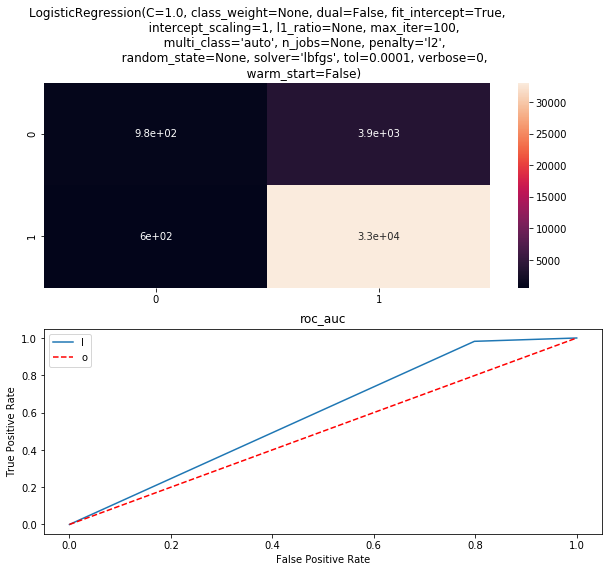

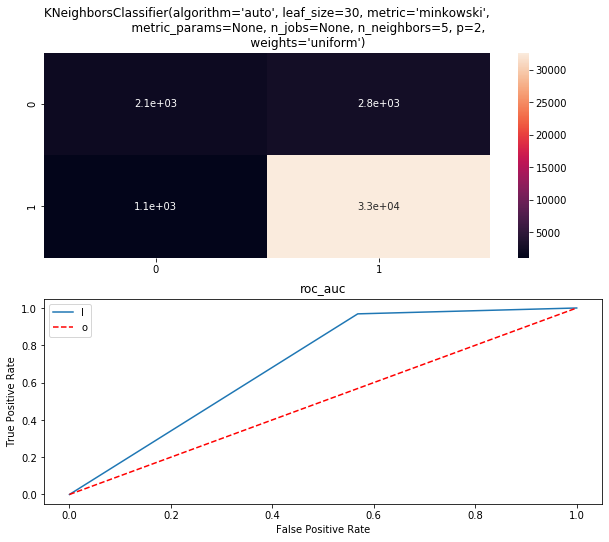

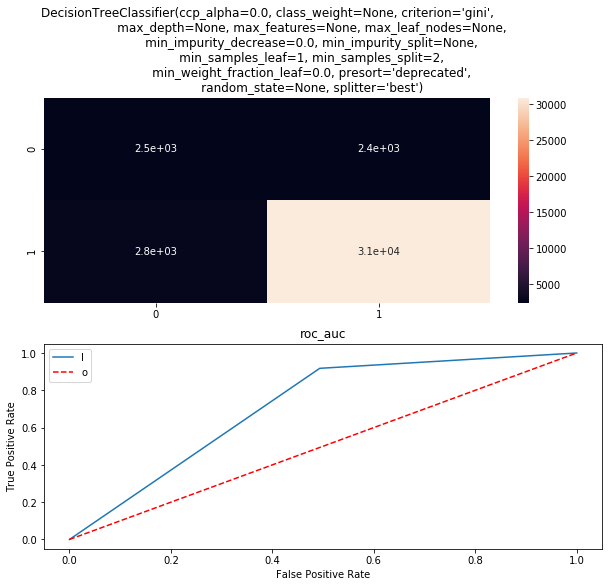

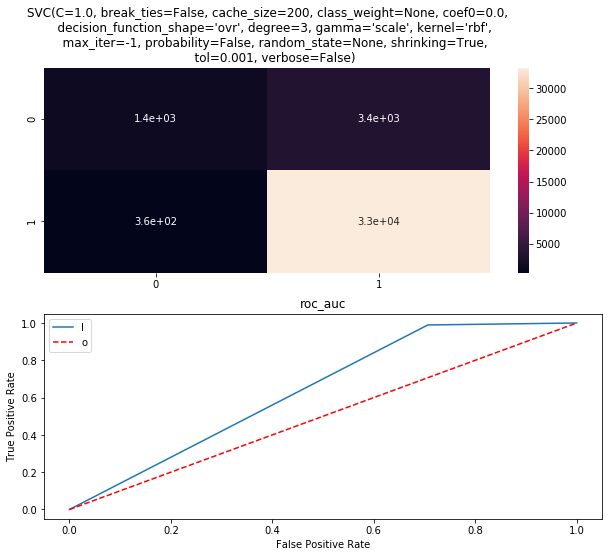

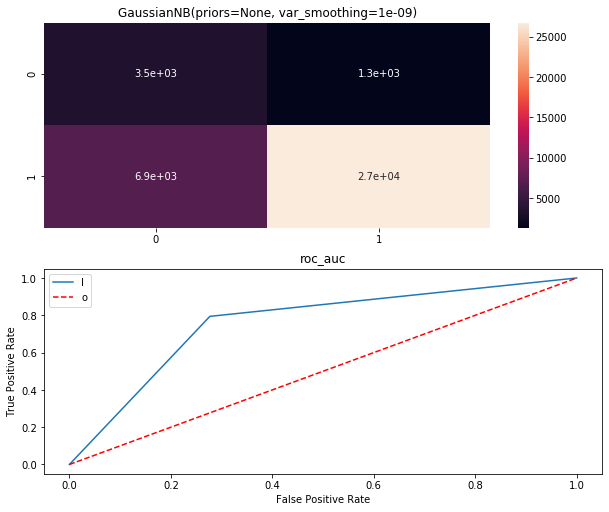

In [57]:
acc_score=[]
roc_score=[]
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),GaussianNB()]
for i,k in zip(models,['LogisticRegression','KNeighbor','DecisionTree','SVC','GaussianNB']):
    print('$$$$$$$$$$$$$$$',k,'$$$$$$$$$$$$$$')
    classification_bestrandomstate(x,y,0.2,i)
    

###### Evaluation Metrics: This problem is concerned about identifying the defaulters i.e, '0' so if our model predict high number of "False positives" i.e predicting a defaulter (0) as non-defaulter (1), this will a risk to the organization. So we will finalize such a model which gives a low False positive rate (i.e high precision) and not disturbing Recall much or if possible gives high Recall along with High Precision.
##### Considering this point SVC is working best among all above used algorithms since it is giving highest precision

##### Performing Cross Validation to check Overfitting / Underfitting

In [58]:
scores=cross_val_score(SVC(),x,y,cv=5,scoring='f1')
print(scores)
print(scores.mean(),scores.std())

[0.94623412 0.94488256 0.94562547 0.94497261 0.94636266]
0.9456154832577395 0.0006150659781160501


* Model is not suffering overfitting

###### Trying Ensemble techniques:
    

$$$$$$$$$$$$$$$ RandomForestClassifier $$$$$$$$$$$$$$
Accuracy score :
 0.9125943996055329

classification_report :
               precision    recall  f1-score   support

           0       0.77      0.44      0.56      4858
           1       0.92      0.98      0.95     33675

    accuracy                           0.91     38533
   macro avg       0.85      0.71      0.76     38533
weighted avg       0.90      0.91      0.90     38533


roc_auc_score :
 0.7106041726074717
AxesSubplot(0.125,0.808774;0.62x0.0712264)



$$$$$$$$$$$$$$$ AdaBoostClassifier $$$$$$$$$$$$$$
Accuracy score :
 0.902940336854125

classification_report :
               precision    recall  f1-score   support

           0       0.83      0.29      0.43      4858
           1       0.91      0.99      0.95     33675

    accuracy                           0.90     38533
   macro avg       0.87      0.64      0.69     38533
weighted avg       0.90      0.90      0.88     38533


roc_auc_score :
 0.64113818946575

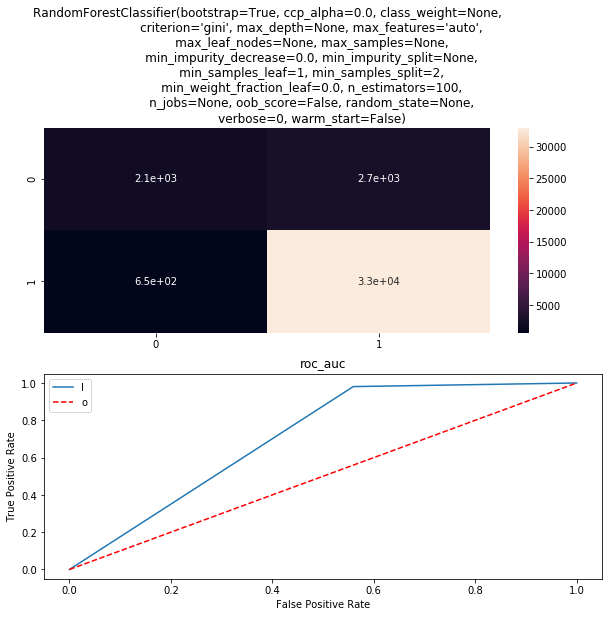

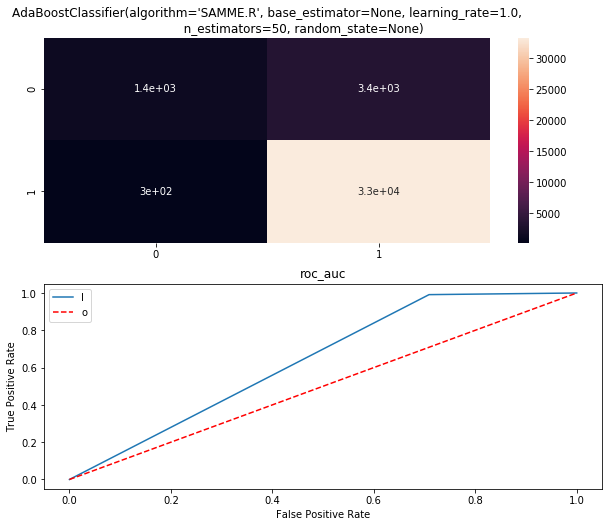

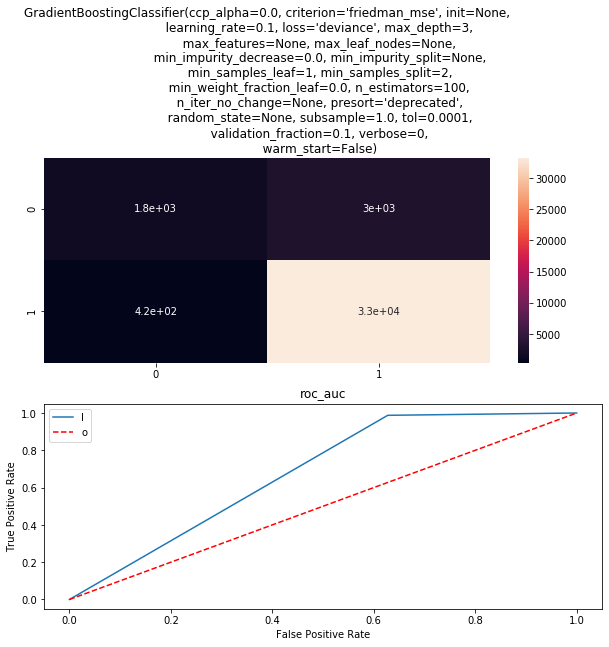

In [59]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
models=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
for i,k in zip(models,['RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier']):
    print('$$$$$$$$$$$$$$$',k,'$$$$$$$$$$$$$$')
    classification_bestrandomstate(x,y,0.2,i)

* We can see that AdaBoost increased precision(macro average) by 1% in comparison to SVR but Recall remains same  (low) However GradientBoosting has increased both the precision and recall by  1% and 4% respectively. So clearly we can opt for GradientBoosting till now . We can do hyperparameter tuninng to get possible combination of precision and Recall

In [60]:
############################# Preparing a method to perform grid search for selected algorithm #############################
scorer_=make_scorer(f1_score,average='macro')
def gridsearch(x,y,model,parameter_dictionary):
        grid_cv=GridSearchCV(estimator=model,param_grid=parameter_dictionary,cv=2,scoring=scorer_)
        grid_cv.fit(x,y)
        print('\n')
        print('score:',grid_cv.best_score_)
        print('best Parameter :',grid_cv.best_params_)

###### Doing step wise Hyperparameter tuning for GradientBoosting

In [61]:
################## Tuning n_estimators and Learning rate ##########################
para_dict1={'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,750,1000,1750]}
gridsearch(x,y,GradientBoostingClassifier(),para_dict1)



score: 0.7603809708503959
best Parameter : {'learning_rate': 0.15, 'n_estimators': 1750}


In [62]:
############################# Tuning pmax_depth #############################
p_dict2 = {'max_depth':[2,3,4,5,6]}
gridsearch(x,y,GradientBoostingClassifier(),p_dict2)



score: 0.7528188139113596
best Parameter : {'max_depth': 6}


In [63]:
########################## Tuning min_samples_split and min_samples_leaf ###############################
p_dict3 = {'min_samples_split':[2,4,6,8,10,20,40], 'min_samples_leaf':[1,3,5,7,9]}
gridsearch(x,y,GradientBoostingClassifier(),p_dict3)



score: 0.7273801080427693
best Parameter : {'min_samples_leaf': 7, 'min_samples_split': 40}


In [64]:
######################## TUNING MAX FEATURES###################
p_dict4 = {'max_features':[2,3,4,5,6,7]}
gridsearch(x,y,GradientBoostingClassifier(),p_dict4)



score: 0.7195767454330132
best Parameter : {'max_features': 7}


In [65]:
#################### Tuning subsample ####################
p_dict5= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}
gridsearch(x,y,GradientBoostingClassifier(),p_dict5)



score: 0.727720123268873
best Parameter : {'subsample': 0.75}


Accuracy score :
 0.9122570264448654

classification_report :
               precision    recall  f1-score   support

           0       0.72      0.49      0.59      4858
           1       0.93      0.97      0.95     33675

    accuracy                           0.91     38533
   macro avg       0.83      0.73      0.77     38533
weighted avg       0.90      0.91      0.90     38533


roc_auc_score :
 0.7319015007657717
AxesSubplot(0.125,0.808774;0.62x0.0712264)





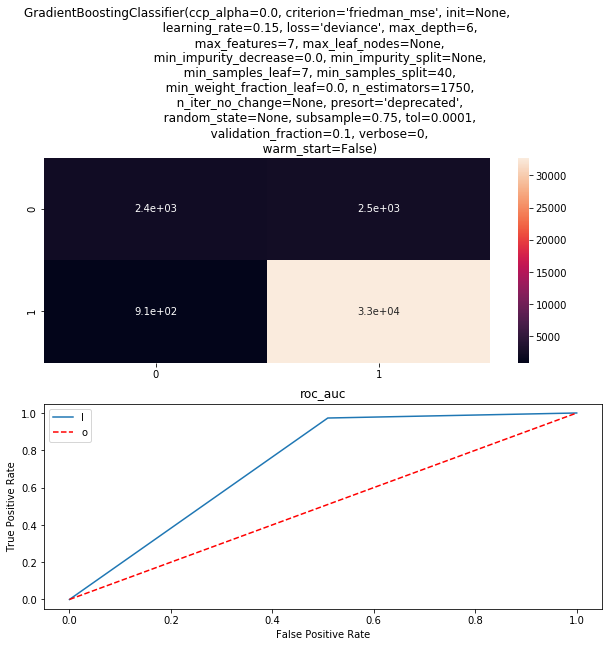

In [66]:
################## Combining all tuned parameters ###############
classification_bestrandomstate(x,y,0.2,GradientBoostingClassifier(n_estimators=1750,learning_rate= 0.15,max_depth=6,
                                                    min_samples_leaf=7,min_samples_split=40,max_features=7,subsample=0.75))

* Hence we are getting the best possible combination of precision and recall  i.e 82% and 73% respectively

In [55]:
model_=GradientBoostingClassifier(n_estimators=1750,learning_rate= 0.15,max_depth=6,
                                                    min_samples_leaf=7,min_samples_split=40,max_features=7,subsample=0.75)

In [56]:
######################## finding best random state for train for the model ########################
max=0
ind=0
for i in range(43,90):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=i,stratify=y)
    model_.fit(train_x,train_y)
    pred=model_.predict(test_x)
    if(max < f1_score(test_y,pred,average='macro')):
            max=f1_score(test_y,pred,average='macro')
            ind=i
print('Best Random state :', ind)
print('Best score :', max)

Best Random state : 65
Best score : 0.7718891853711862


* output remainded same so we will finalize the same random state used earlier

In [77]:
########################### finalizing the model ###########################
from sklearn.externals import joblib
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=43,stratify=y)
model_.fit(train_x,train_y)
pred=model_.predict(test_x)
print(classification_report(test_y,pred))


              precision    recall  f1-score   support

           0       0.70      0.48      0.57      4858
           1       0.93      0.97      0.95     33675

    accuracy                           0.91     38533
   macro avg       0.82      0.73      0.76     38533
weighted avg       0.90      0.91      0.90     38533



In [78]:
joblib.dump(model_,'micro_credit_defaulter_predicter.obj')

['micro_credit_defaulter_predicter.obj']